In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
scaler=StandardScaler()

In [2]:
housing=fetch_california_housing()
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [3]:
x_train_all, x_test_all, y_train_all, y_test=train_test_split(housing['data'],housing['target'])
x_train_all.shape,y_train_all.shape

((15480, 8), (15480,))

In [13]:
x_train=scaler.fit_transform(x_train_all)
x_test=scaler.fit_transform(x_test_all)
x_test.shape,y_test.shape

((5160, 8), (5160,))

In [5]:
x_real_train, x_valid=train_test_split(x_train)
x_real_train.shape, x_valid.shape

((11610, 8), (3870, 8))

In [6]:
y_real_train, y_valid=train_test_split(y_train_all)
y_real_train.shape, y_valid.shape

((11610,), (3870,))

In [7]:
reg_model=keras.models.Sequential([keras.layers.Input(shape=(x_real_train.shape[1:])),
                                   keras.layers.Dense(50,activation='relu'),
                                   keras.layers.Dense(10,activation='relu'),
                                   keras.layers.Dense(1)])

In [8]:
reg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 971
Trainable params: 971
Non-trainable params: 0
_________________________________________________________________


In [9]:
reg_model.compile(loss='mae',optimizer='sgd',metrics=['mse'])
a=reg_model.fit(x_real_train[0:],y_real_train,batch_size=16,epochs=25,validation_data=[x_valid,y_valid])

Epoch 1/25
726/726 [==============================] - 1s 907us/step - loss: 0.9411 - mse: 1.6412 - val_loss: 0.8932 - val_mse: 1.4100
Epoch 2/25
726/726 [==============================] - 1s 781us/step - loss: 0.8931 - mse: 1.4304 - val_loss: 0.8936 - val_mse: 1.4740
Epoch 3/25
726/726 [==============================] - 1s 768us/step - loss: 0.8902 - mse: 1.4231 - val_loss: 0.8866 - val_mse: 1.4144
Epoch 4/25
726/726 [==============================] - 1s 805us/step - loss: 0.8879 - mse: 1.4176 - val_loss: 0.8887 - val_mse: 1.4442
Epoch 5/25
726/726 [==============================] - 1s 1ms/step - loss: 0.8871 - mse: 1.4106 - val_loss: 0.8869 - val_mse: 1.4265
Epoch 6/25
726/726 [==============================] - 1s 2ms/step - loss: 0.8867 - mse: 1.4137 - val_loss: 0.8895 - val_mse: 1.3898
Epoch 7/25
726/726 [==============================] - 1s 1ms/step - loss: 0.8858 - mse: 1.4081 - val_loss: 0.8858 - val_mse: 1.3923
Epoch 8/25
726/726 [==============================] - 1s 2ms/step - 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
A=pd.DataFrame(a.history)

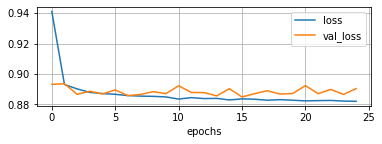

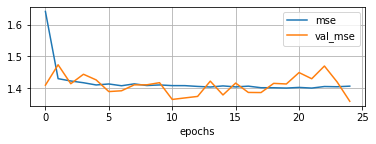

In [11]:
plt.subplot(211)
plt.plot(A['loss'])
plt.plot(A['val_loss'])
plt.grid()
plt.xlabel('epochs')
plt.legend(['loss','val_loss'])
plt.show()

plt.subplot(212)
plt.plot(A['mse'])
plt.plot(A['val_mse'])
plt.grid()
plt.xlabel('epochs')
plt.legend(['mse','val_mse'])
plt.show()

In [18]:
mse_model=reg_model.evaluate(x_test,y_test)
x_new=x_test[:10]
y_pred=reg_model.predict(x_new)
y_pred

162/162 [==============================] - 0s 570us/step - loss: 0.8881 - mse: 1.3682


array([[1.9049604],
       [1.8988702],
       [1.7429411],
       [1.8699827],
       [1.6220152],
       [1.9648123],
       [1.9095299],
       [1.9192736],
       [1.9678428],
       [1.8355703]], dtype=float32)